A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not. company wants to know which variables are significant in predicting the price of a house and how well those variables describe the price of a house.


**Problem Statement**: The company wants to understand the driving factors (or driver variables) how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market

In [18]:
#Import all the needed libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### 1. Data Understanding 

In [19]:
#Load the dataset and check the column we have in the dataset
house=pd.read_csv('train.csv')
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [20]:
#Change display option in dataset to get all the columns and check first few values
pd.set_option('display.max_columns',100)
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
# Check for column Names
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

The target variable, which we want to compare across the independent variables, is **SalePrice**. The strategy is to figure out various independent variables and identify the ones that affect Sale Price most.

In [22]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
house.shape

(1460, 81)

In [24]:
#Check for null columns and their percentage to drop the columns that have more null values
NA=house.isna().sum()
(NA[NA>0]/house.shape[0])*100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

**Observations**
From the above analysis we can see that columns Alley,PoolQC,Fence,MiscFeature have more than 80% null values so removing them
as they don't add much to data analysis

In [25]:
# removing the columns having more than 80% missing values
missing_columns = house.columns[100*(house.isnull().sum()/len(house.index)) > 80]
print(missing_columns)

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [26]:
house = house.drop(missing_columns, axis=1)
print(house.shape)

(1460, 77)


In [27]:
# summarise number of missing values again
NA=house.isna().sum()
(NA[NA>0]/house.shape[0])*100

LotFrontage     17.739726
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

Since the missing values not greater in number above null values can be ignored for now. Since we have completed data understanding,cleaning and treatment of nulls. Let's move towards data analysis and understanding how the Sales price varies with different input values


## Data Analysis

Let's split columns into categorical and Numerical value columns for ease in analysis as the number of columns are 77 better 
split them and analyse them rather than doing at one go

In [28]:
categorical_columns=[col for col in house.columns if house[col].dtype=='object']
numerical_columns=house.columns.drop(categorical_columns)

Analyse Numerical columns first by plotting histograms

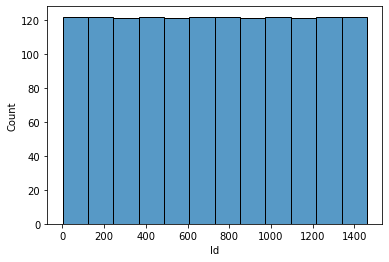

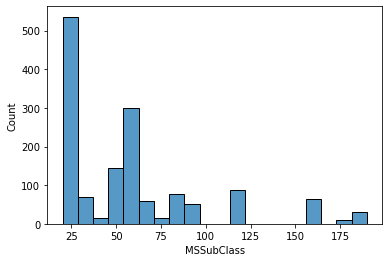

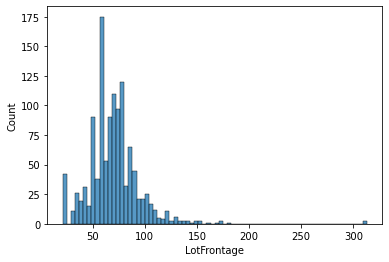

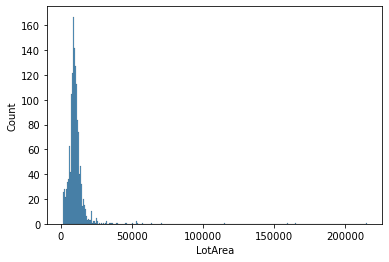

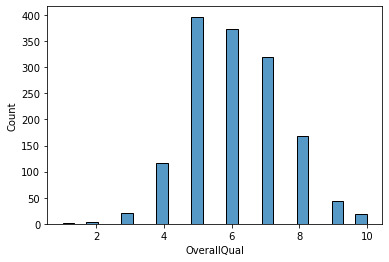

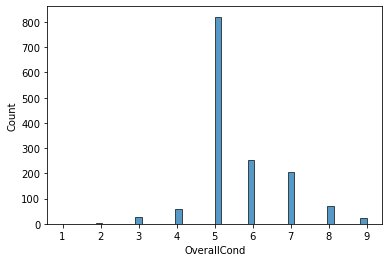

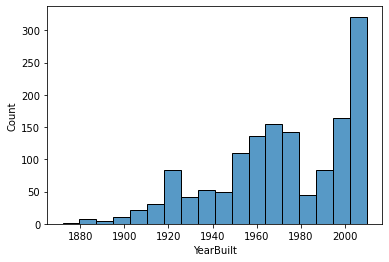

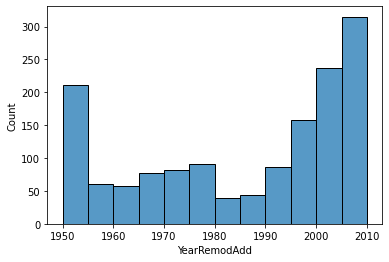

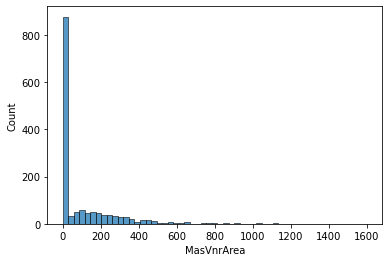

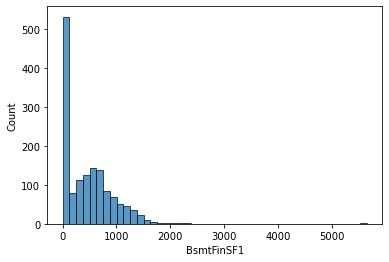

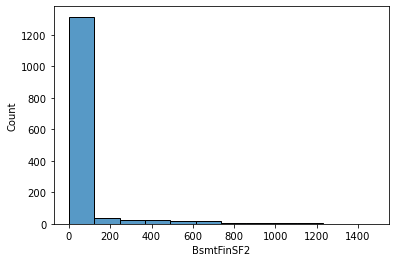

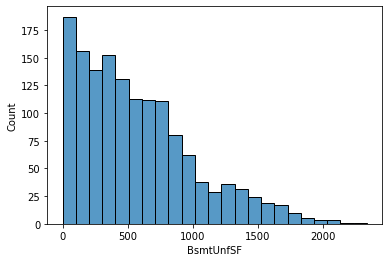

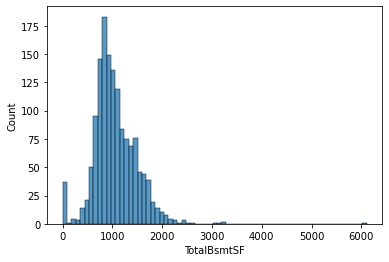

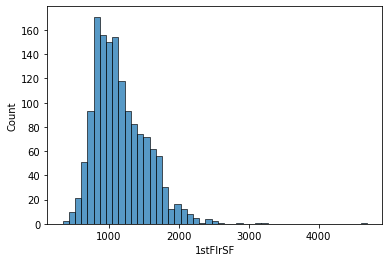

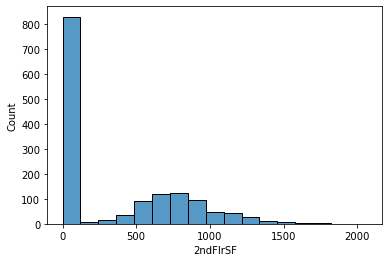

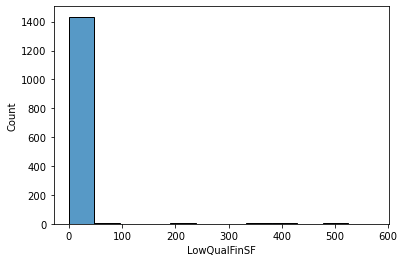

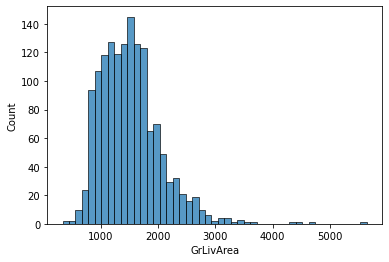

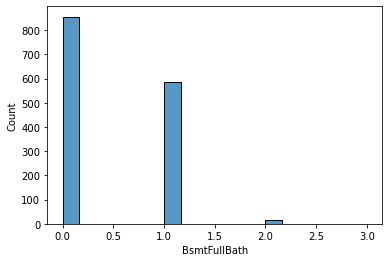

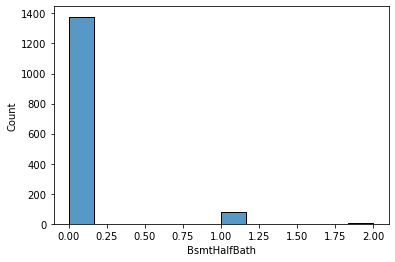

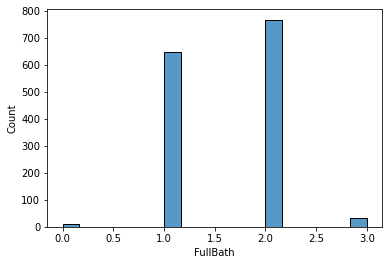

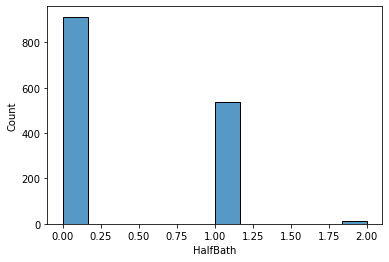

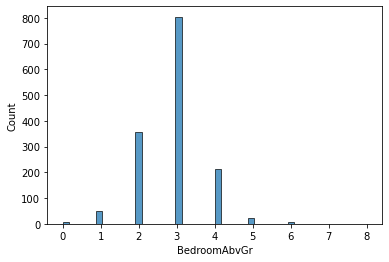

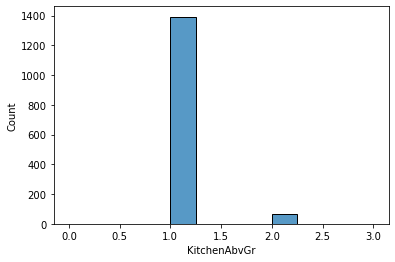

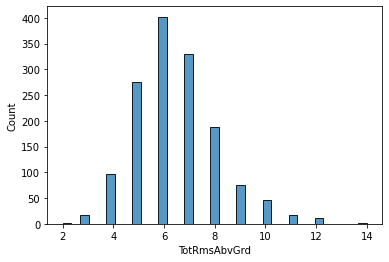

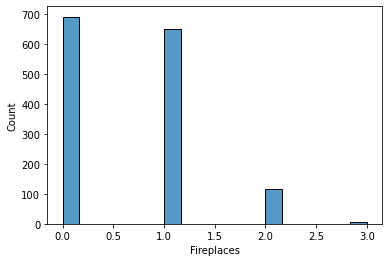

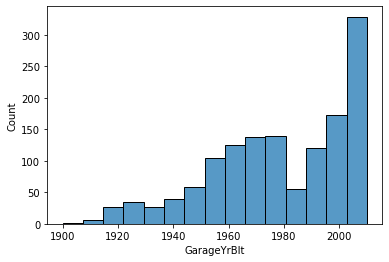

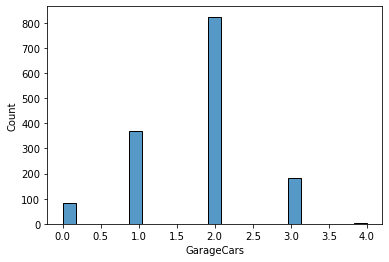

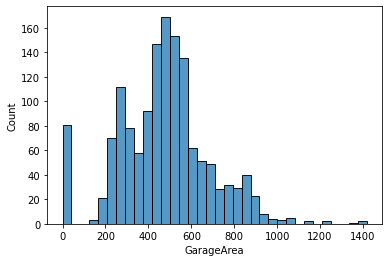

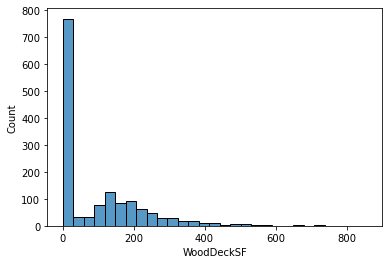

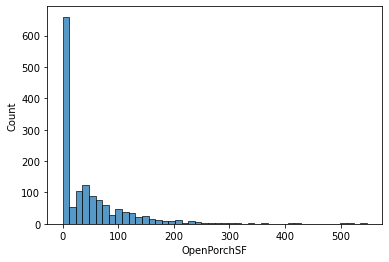

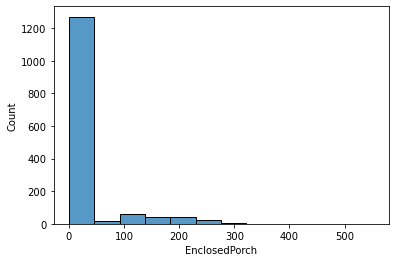

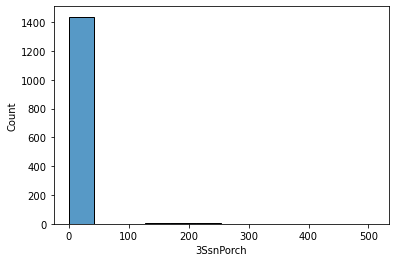

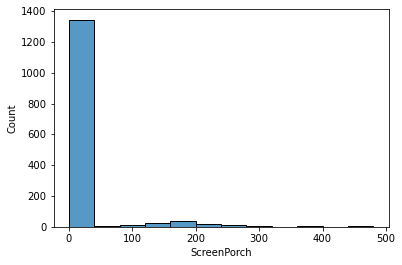

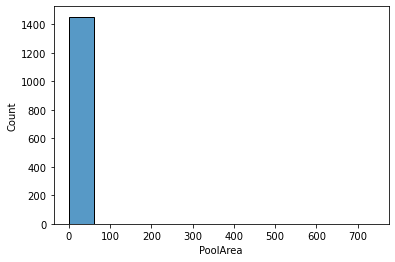

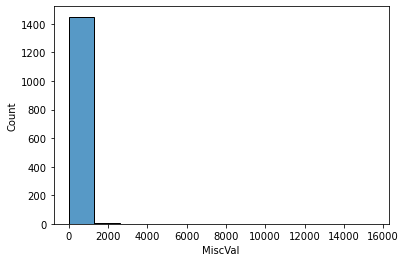

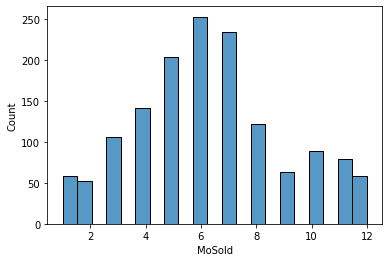

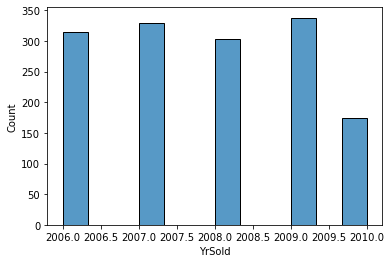

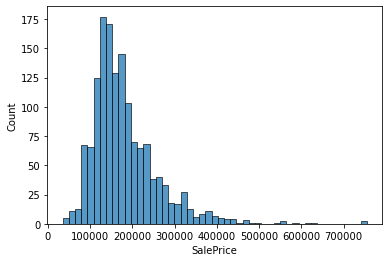

In [29]:
for col in numerical_columns:
  sns.histplot(house[col])
  plt.show()
 

**Observations**

Some of the features have high density at the starting.f and also some features are skewed like SalePrice we will apply log transformations later on for these features.

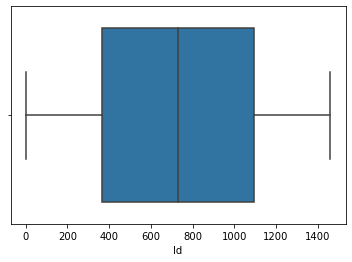

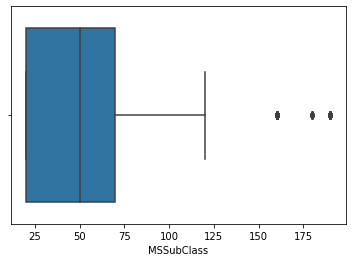

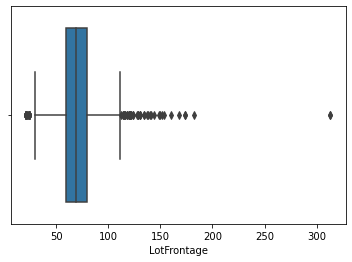

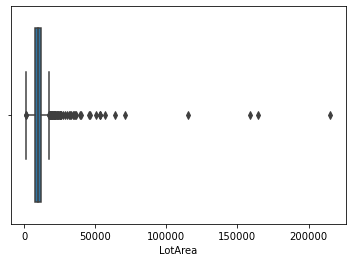

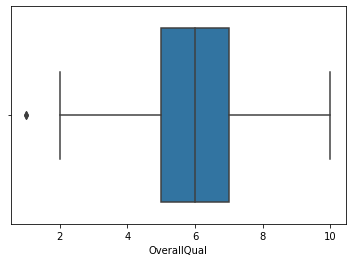

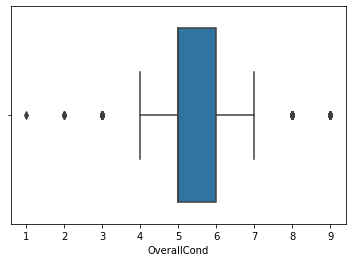

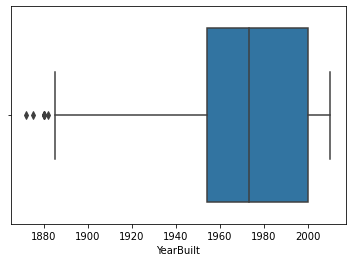

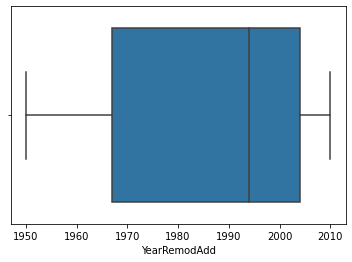

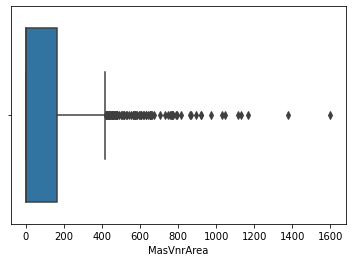

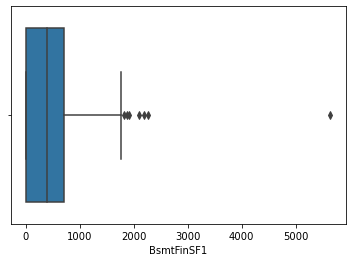

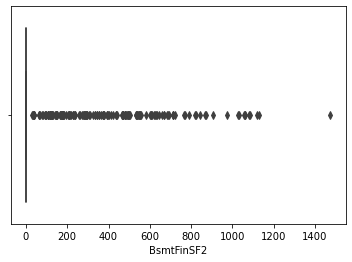

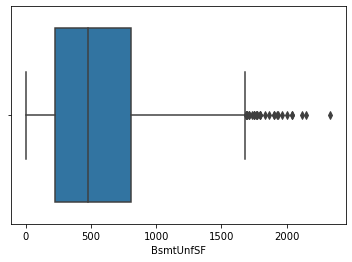

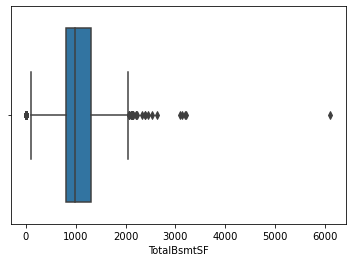

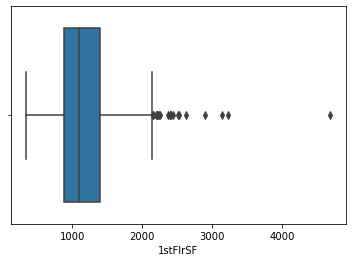

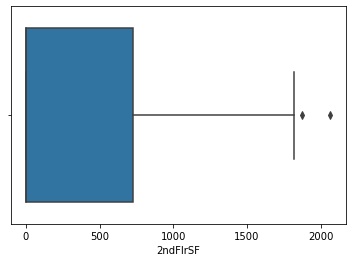

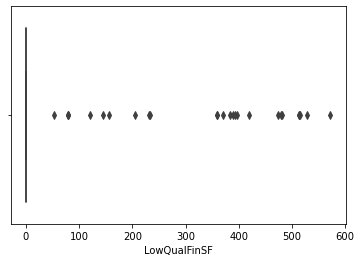

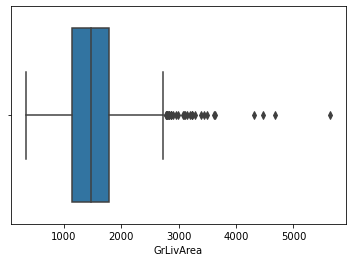

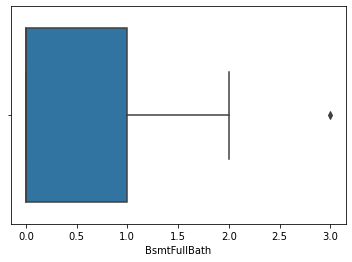

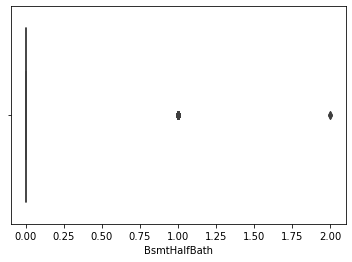

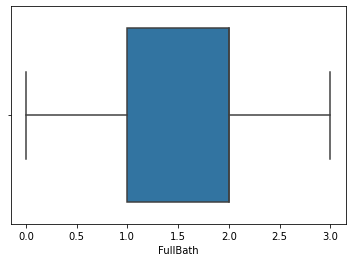

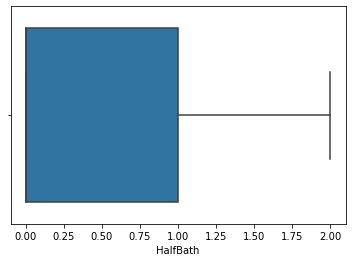

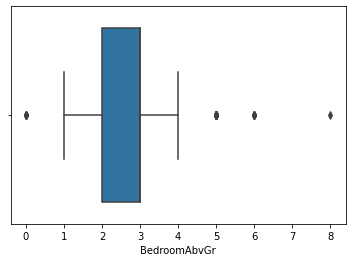

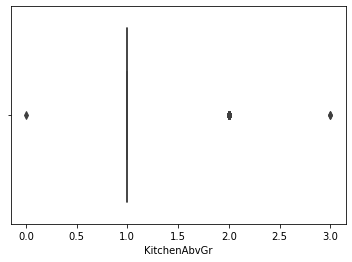

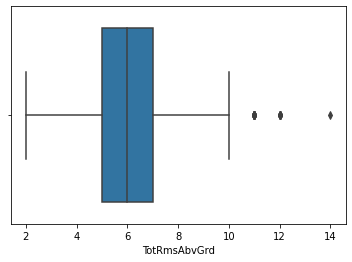

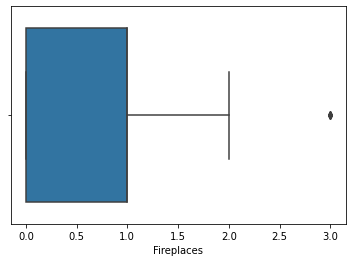

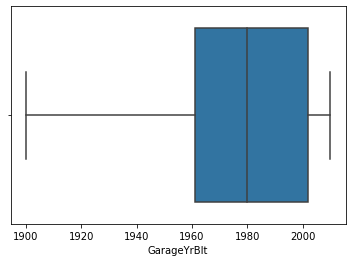

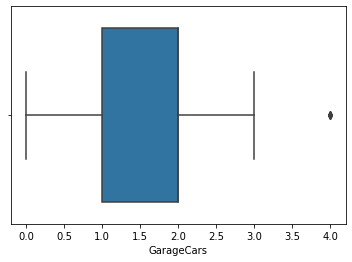

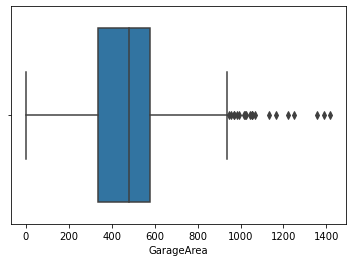

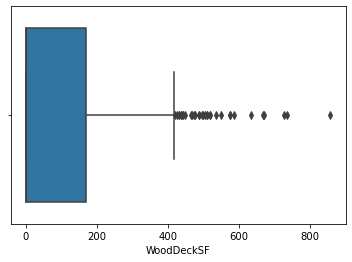

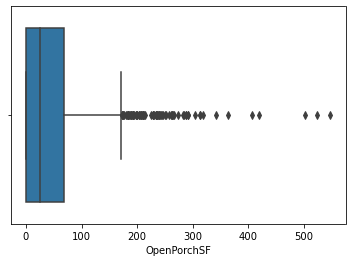

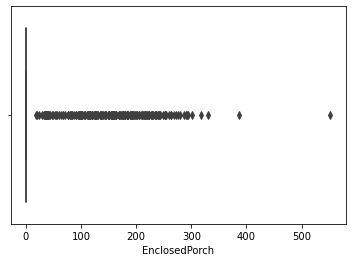

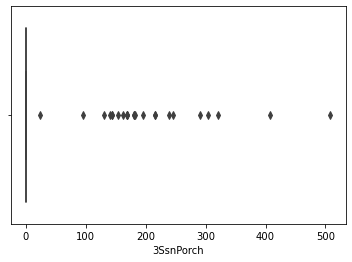

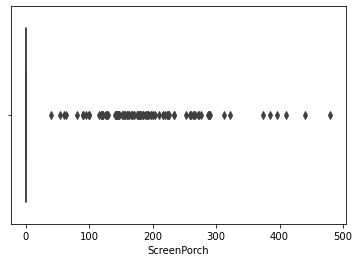

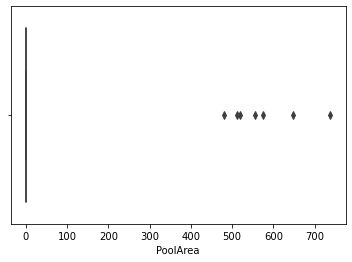

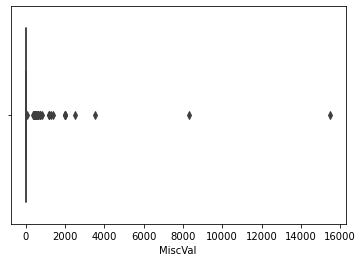

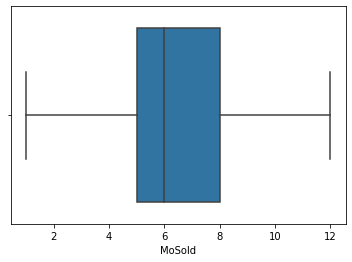

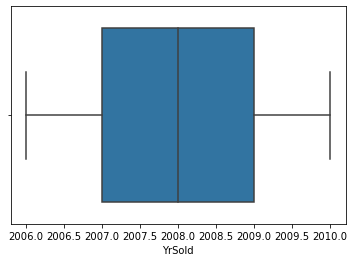

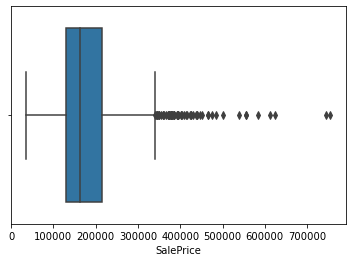

In [30]:
#Continue the analysis for numerical columns by plotting box plot
for col in numerical_columns:
    sns.boxplot(house[col])
    plt.show()

**Observations***
Using boxplots we are able to find that some of the features have outliers. As the data is less here not dropping them 

In [31]:
#Catergorical Variables Analysis using count plots

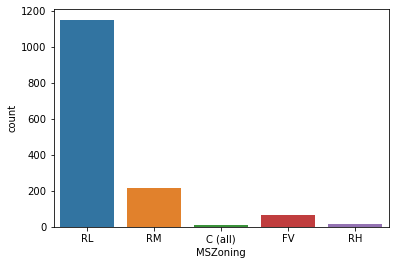

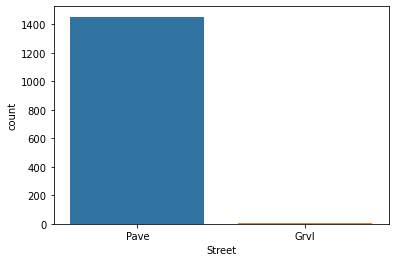

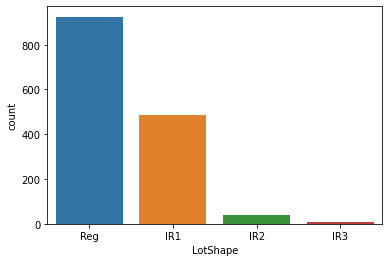

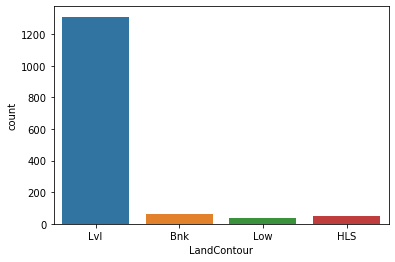

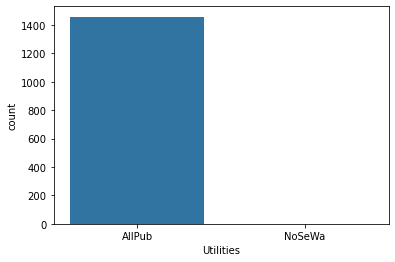

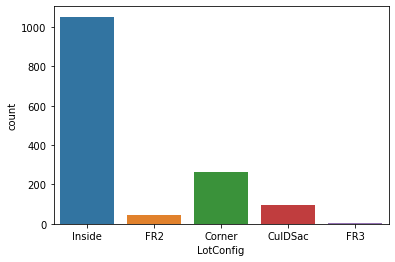

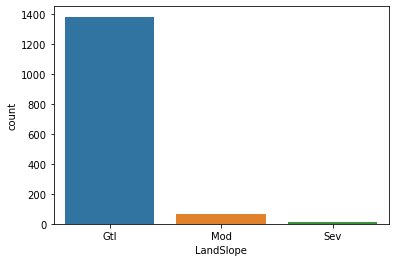

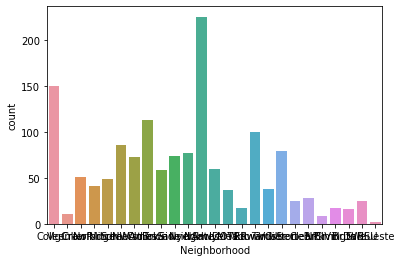

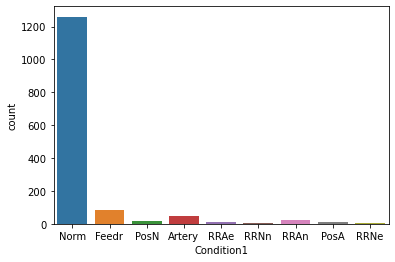

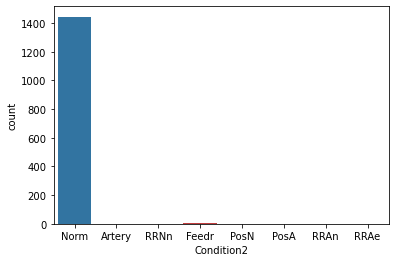

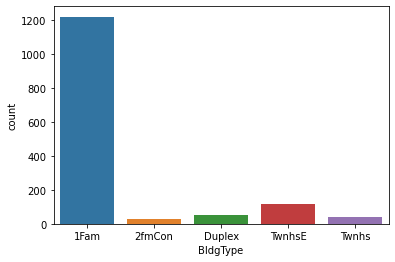

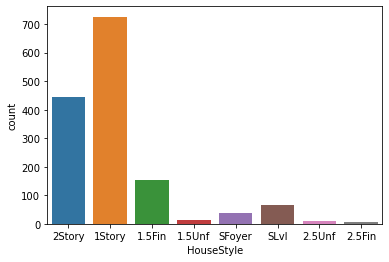

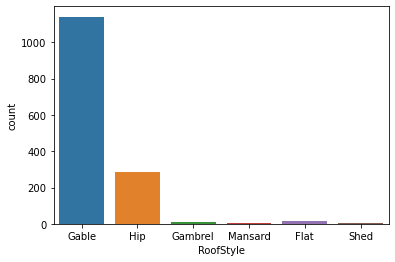

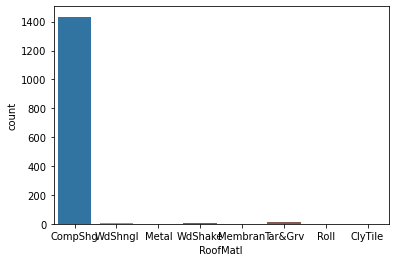

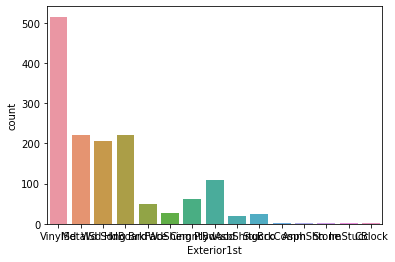

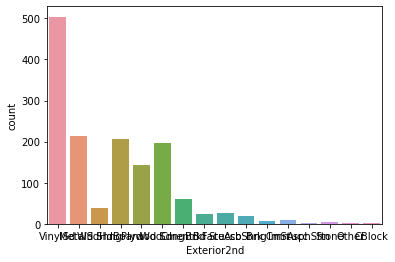

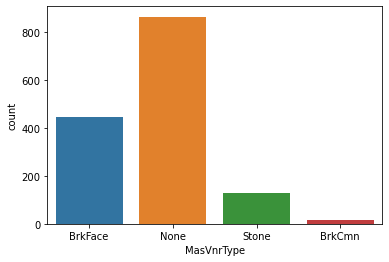

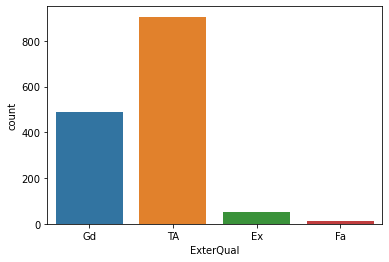

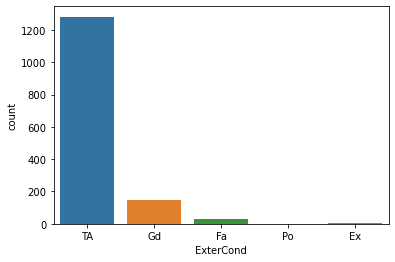

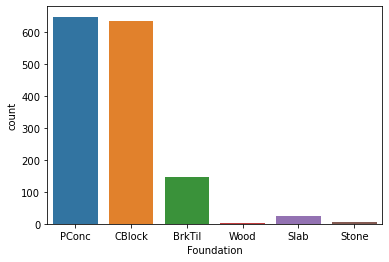

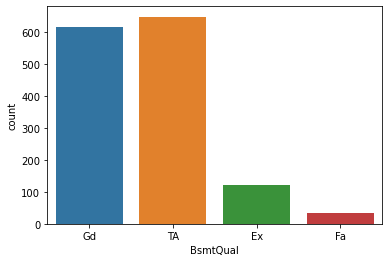

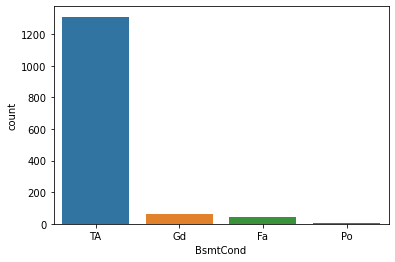

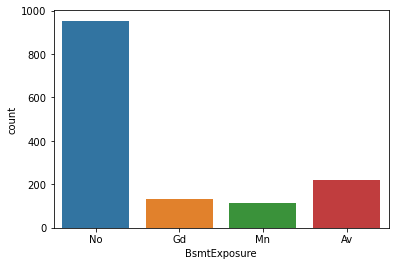

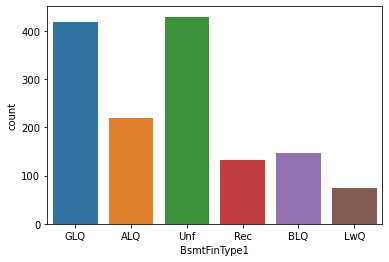

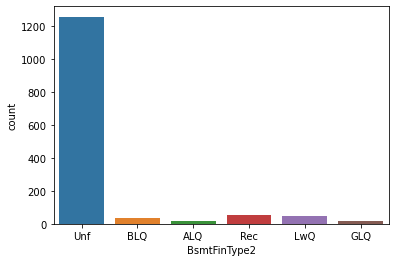

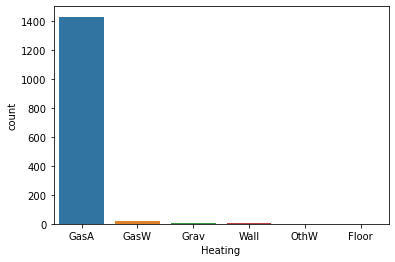

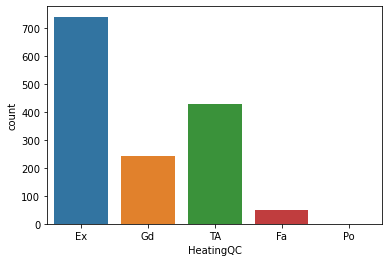

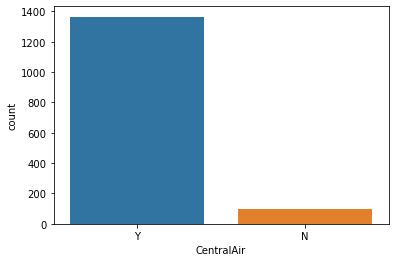

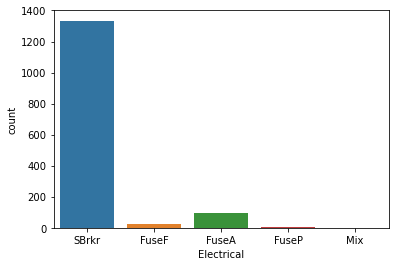

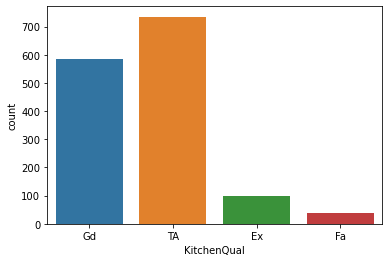

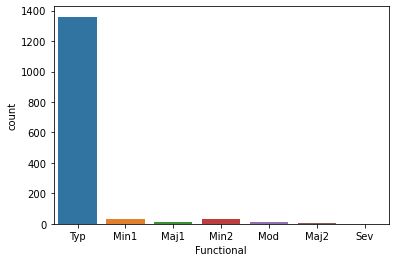

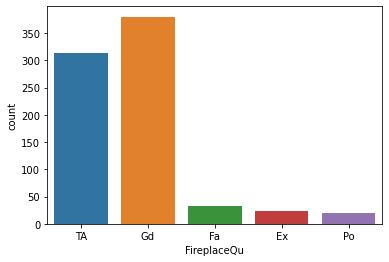

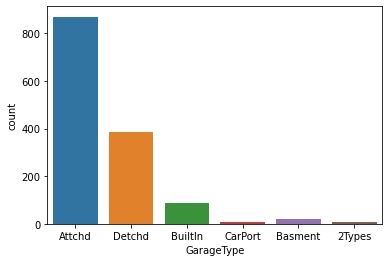

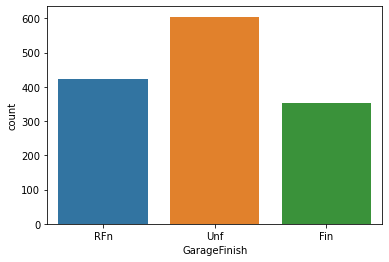

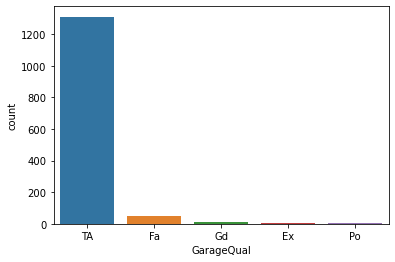

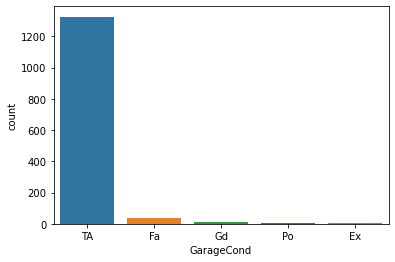

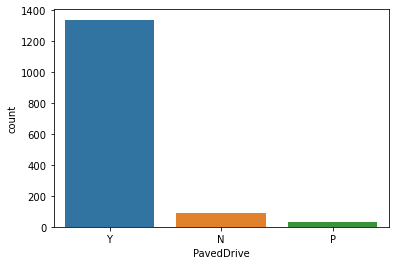

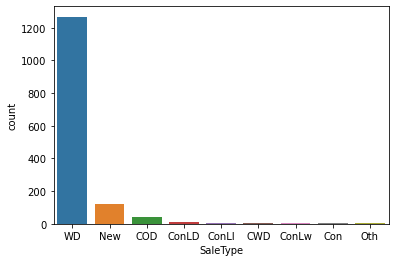

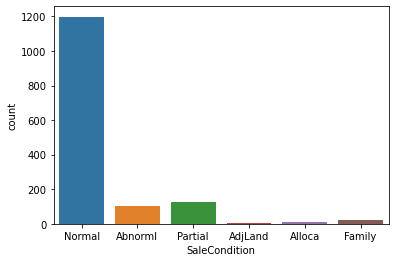

In [32]:
for col in categorical_columns:
  sns.countplot(house[col])
  plt.show()

**Observations**
By doing count plt for categorical variable we can drop some of the features where only one lable is mostly used like 'Utilities' Feature

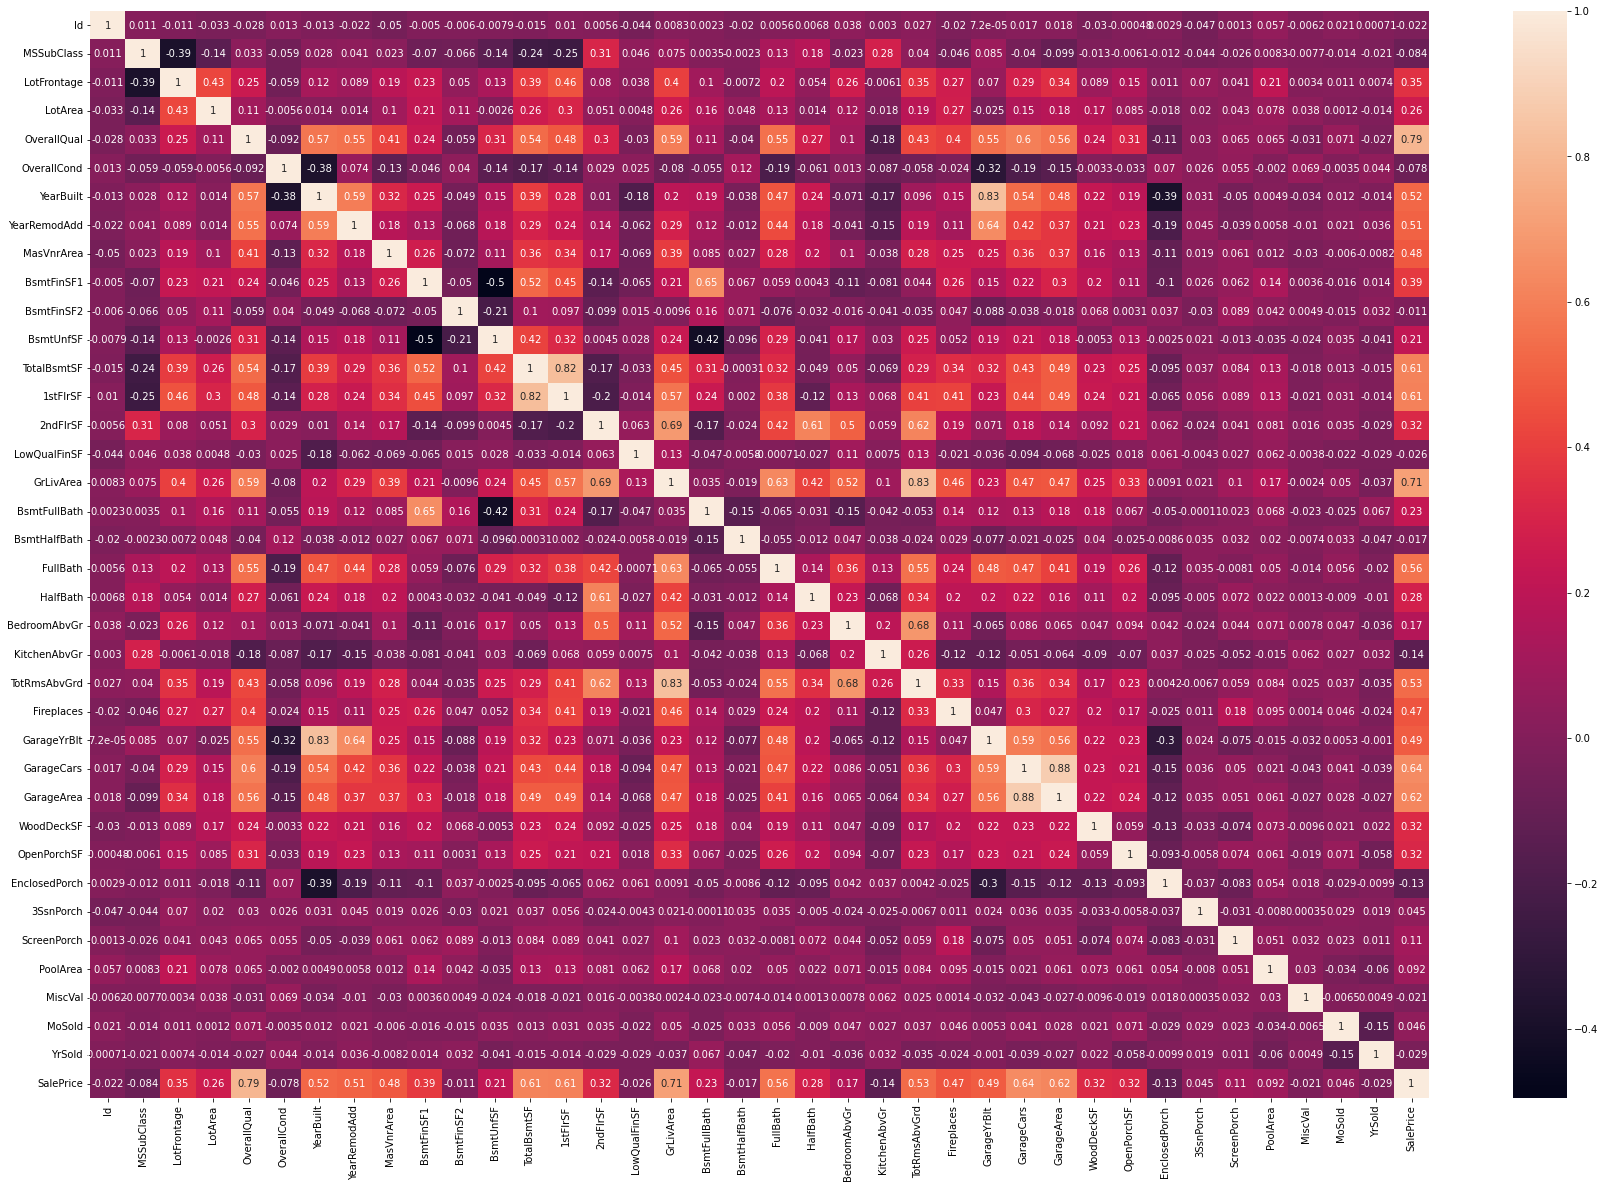

In [33]:
#Check correaltion Matrix
plt.figure(figsize=(30,20))
sns.heatmap(house.corr(),annot=True)
plt.show()

**Observations**
The correlation matrix shows the correlation between the features.
We can see that some of the features are hghly correlated, so this will lead to multi collinearity issue during model development. Need to drop those columns.

Some of the features are not at all correlated with target Variable SalePrice.We will drop them.

In [34]:
house.drop(['FireplaceQu','Id'],axis=1,inplace=True)

**Handling Missing Values**

In [35]:
numerical_Cols_With_Null=[col for col in house if (house[col].isnull().sum()>0) and house[col].dtypes!='O']
numerical_Cols_With_Null


['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

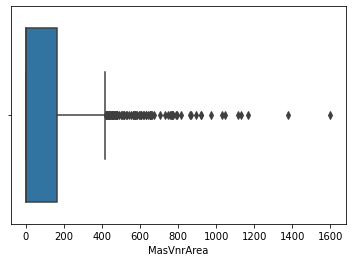

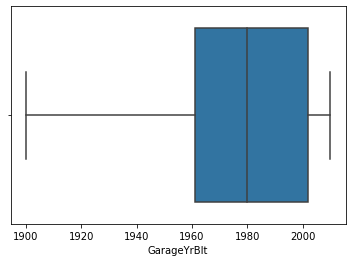

In [36]:
for col in ['MasVnrArea', 'GarageYrBlt']:
    sns.boxplot(house[col])
    plt.show()


For MasVnrType and MasVnrArea - Assign null value as none and 0 sq area for MasVnrType and MasVnrArea respectively

In [37]:
house['MasVnrType'].fillna("None",inplace=True)
house['MasVnrArea'].fillna(0,inplace=True)

In [38]:
house.columns[house.isna().sum()>0]

Index(['LotFrontage', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

For Garage and Basement by seeing the columns we can infer since there is no garage and basement for these houses and those values are null.

So, now we will fill them with NA as these are ordinal variables we will be relacing NA with 0 later on

In [39]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
  house[col].fillna("NA",inplace=True)
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2']:
  house[col].fillna("NA",inplace=True)

In [40]:
house.columns[house.isna().sum()>0]

Index(['LotFrontage', 'Electrical', 'GarageYrBlt'], dtype='object')

In [41]:
house['GarageYrBlt'].isnull().sum()

81

In [42]:
#Fill Median Value for GarageYrBlt for missing values
house['GarageYrBlt'].fillna(house['GarageYrBlt'].median(),inplace=True)
house['LotFrontage'].fillna(house['LotFrontage'].median(),inplace=True)


In [43]:
house['Electrical'].isnull().sum()

1

In [44]:
#Fill standard value for electrical
house['Electrical'].fillna("SBrkr",inplace=True)

In [45]:
house.columns[house.isna().sum()>0]

Index([], dtype='object')

All the Null Values are handled now

**Transformations**

In [46]:
#Previously we saw that some the features are skewed so lets do log transformation on these

In [47]:
for feature in ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']:
    house[feature]=np.log(house[feature])

Handling Ordinal Categorical Variables

In [48]:
scale= {"NA":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}
ordinalcols=['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual','GarageQual', 'GarageCond','GarageType','GarageFinish']
house[ordinalcols]=house[ordinalcols].replace(scale)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.174387,9.041922,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,No,GLQ,706,Unf,0,150,856,GasA,5,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,4,8,Typ,0,Attchd,2003.0,RFn,2,548,3,3,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,20,RL,4.382027,9.169518,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,Gd,ALQ,978,Unf,0,284,1262,GasA,5,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,3,6,Typ,1,Attchd,1976.0,RFn,2,460,3,3,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,60,RL,4.219508,9.328123,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,Mn,GLQ,486,Unf,0,434,920,GasA,5,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,4,6,Typ,1,Attchd,2001.0,RFn,2,608,3,3,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,70,RL,4.094345,9.164296,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,No,ALQ,216,Unf,0,540,756,GasA,4,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,4,7,Typ,1,Detchd,1998.0,Unf,3,642,3,3,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,60,RL,4.430817,9.565214,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,Av,GLQ,655,Unf,0,490,1145,GasA,5,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,4,9,Typ,1,Attchd,2000.0,RFn,3,836,3,3,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429216


In [49]:
scale= {"NA":0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5,"GLQ":6}
ordinalcols=['BsmtFinType1', 'BsmtFinType2']
house[ordinalcols]=house[ordinalcols].replace(scale)

In [50]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.174387,9.041922,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,No,6,706,1,0,150,856,GasA,5,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,4,8,Typ,0,Attchd,2003.0,RFn,2,548,3,3,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,20,RL,4.382027,9.169518,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,Gd,5,978,1,0,284,1262,GasA,5,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,3,6,Typ,1,Attchd,1976.0,RFn,2,460,3,3,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,60,RL,4.219508,9.328123,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,Mn,6,486,1,0,434,920,GasA,5,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,4,6,Typ,1,Attchd,2001.0,RFn,2,608,3,3,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,70,RL,4.094345,9.164296,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,No,5,216,1,0,540,756,GasA,4,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,4,7,Typ,1,Detchd,1998.0,Unf,3,642,3,3,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,60,RL,4.430817,9.565214,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,Av,6,655,1,0,490,1145,GasA,5,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,4,9,Typ,1,Attchd,2000.0,RFn,3,836,3,3,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429216


In [51]:
#Remove the categorcal variables that doesnt have much variance with the target variable
house.rename(columns={'YearBuilt':'PropertyAge'},inplace=True)
house.drop(['MoSold','YrSold','YearRemodAdd','GarageYrBlt'], inplace=True,axis = 1)
categorical_features_to_remove=['Condition2','RoofMatl','Heating','Functional','Street','Utilities']
house.drop(categorical_features_to_remove,inplace=True,axis=1)

##Pair Plot to identify whether some of the features have any corrlation with target variables

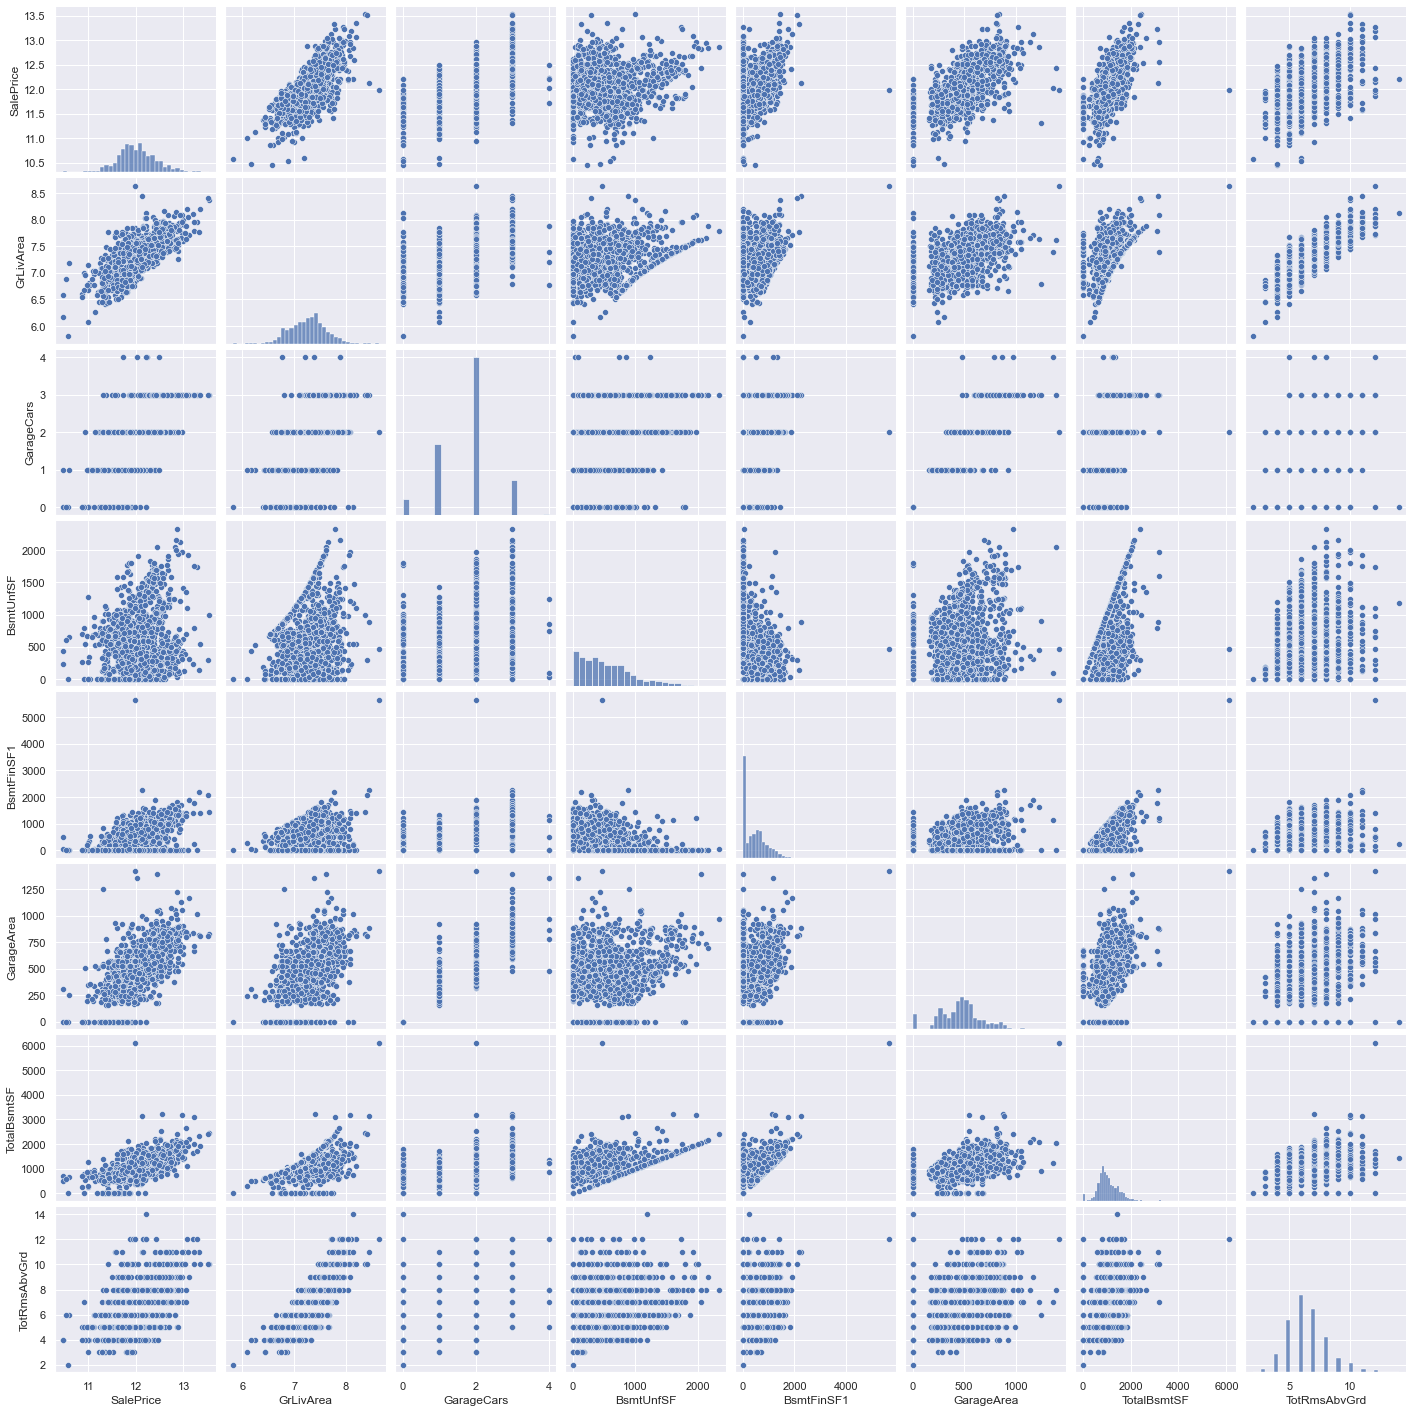

In [52]:
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd']
sns.pairplot(house[cols], size = 2.5)
plt.show()

#Drop the variables which do not correlate much with SalePrice

In [53]:
house.drop(['GarageCars','BsmtUnfSF','TotRmsAbvGrd'], inplace=True,axis = 1)

##Handling Nominal Categorical variables

In [54]:
categorical_features=[col for col in house.columns if house[col].dtype=='O']
categorical_features

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'BsmtExposure',
 'CentralAir',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [55]:
num_var_to_scale=[col for col in house.columns if col not in categorical_features]

In [56]:
extra_Cols=pd.get_dummies(house[categorical_features],drop_first=True)
extra_Cols

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,...,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1456,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1457,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1458,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0

In [57]:
house=pd.concat([house,extra_Cols],axis=1)
house.drop(categorical_features,inplace=True,axis=1)
house.shape


(1460, 174)

In [58]:
house.shape

(1460, 174)

Finally we have 178 columns and 1460 rows. Lets start building models

In [59]:
num_var_to_scale.remove('SalePrice')

In [60]:
x,y=house,house.pop('SalePrice')

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [62]:
print(X_train.shape,y_train.shape)

(1022, 173) (1022,)


##Scaling Train and Test data

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[num_var_to_scale]=scaler.fit_transform(X_train[num_var_to_scale])
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,PropertyAge,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,...,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
632,0.000000,0.517503,0.433352,0.666667,0.428571,0.760870,0.130625,0.333333,0.75,0.6,0.75,0.833333,0.145641,0.166667,0.0,0.226841,0.333333,0.545290,0.000000,0.0,0.509723,0.000000,0.0,0.666667,0.0,0.375,0.5,0.333333,0.333333,0.383639,0.6,0.6,0.260870,0.000000,0.0,0.0,0.000000,0.0,0.000000,0,0,1,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
208,0.235294,0.440313,0.470183,0.666667,0.428571,0.840580,0.080000,0.666667,0.50,0.8,0.75,1.000000,0.188696,0.166667,0.0,0.189362,1.000000,0.477632,0.471154,0.0,0.643928,0.333333,0.0,0.666667,0.5,0.375,0.5,0.333333,0.333333,0.320169,0.6,0.6,0.081522,0.100548,0.0,0.0,0.320833,0.0,0.000000,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
83,0.000000,0.495064,0.376323,0.444444,0.428571,0.637681,0.041250,0.333333,0.50,0.6,0.75,0.166667,0.000000,0.166667,0.0,0.174304,0.666667,0.438827,0.000000,0.0,0.410205,0.000000,0.0,0.333333,0.5,0.375,0.5,0.333333,0.000000,0.325106,0.6,0.6,0.100543,0.000000,0.0,0.0,0.000000,0.0,0.000000,0,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1174,0.294118,0.495064,0.498027,0.555556,0.857143,0.434783,0.000000,0.333333,0.50,0.8,0.75,0.500000,0.089121,0.166667,0.0,0.155810,0.333333,0.474411,0.627671,0.0,0.689424,0.000000,0.0,0.666667,0.5,0.500,0.5,0.333333,0.333333,0.253879,0.6,0.6,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
250,0.058824,0.356375,0.276887,0.222222,0.000000,0.492754,0.000000,0.333333,0.00,0.6,0.75,0.166667,0.000000,0.166667,0.0,0.119149,1.000000,0.516025,0.000000,0.0,0.482368,0.000000,0.0,0.333333,0.0,0.375,0.5,0.000000,0.000000,0.000000,0.0,0.0,0.357337,0.000000,0.0,0.0,0.000000,0.0,0.029032,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [64]:
X_test[num_var_to_scale]=scaler.transform(X_test[num_var_to_scale])
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,PropertyAge,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,...,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
258,0.235294,0.495064,0.441959,0.666667,0.428571,0.934783,0.107500,0.666667,0.50,0.8,0.75,1.000000,0.063962,0.166667,0.000000,0.157610,1.000000,0.400728,0.442842,0.000000,0.594282,0.000000,0.0,0.666667,0.5,0.375,0.5,0.666667,0.333333,0.397743,0.6,0.6,0.000000,0.175503,0.0,0.482283,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
267,0.323529,0.388581,0.365182,0.444444,0.857143,0.485507,0.000000,0.333333,0.50,0.6,0.75,0.333333,0.066974,0.166667,0.000000,0.117840,1.000000,0.434179,0.384615,0.734266,0.665556,0.000000,0.0,0.666667,0.5,0.500,0.5,0.666667,0.333333,0.169252,0.6,0.6,0.355978,0.043876,0.0,0.000000,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
288,0.000000,0.440313,0.395731,0.444444,0.428571,0.688406,0.019375,0.333333,0.75,0.6,0.75,0.666667,0.079731,0.166667,0.000000,0.144354,0.333333,0.375123,0.000000,0.000000,0.350656,0.000000,0.0,0.333333,0.0,0.375,0.5,0.333333,0.000000,0.197461,0.6,0.6,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
649,0.941176,0.000000,0.077946,0.333333,0.571429,0.710145,0.000000,0.333333,0.50,0.8,0.75,0.666667,0.023210,1.000000,0.338535,0.103110,0.666667,0.240146,0.000000,0.000000,0.224482,0.333333,0.0,0.333333,0.0,0.125,0.5,0.333333,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1233,0.000000,0.440313,0.437582,0.444444,0.428571,0.630435,0.112500,0.333333,0.50,0.6,0.75,0.500000,0.177179,0.166667,0.000000,0.194435,0.000000,0.480189,0.000000,0.000000,0.448869,0.333333,0.0,0.333333,0.0,0.375,0.5,0.333333,0.000000,0.374471,0.6,0.6,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


Linear Model

In [65]:

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     64.43
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:50:52   Log-Likelihood:                 874.98
No. Observations:                1022   AIC:                            -1408.
Df Residuals:                     851   BIC:                            -565.0
Df Model:                         170                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     9.9835      0.162     61.560      0.000       9.665      10.302
MSSubClass                0.0774      0.117      0.662      0.508      -0.152       0.307
LotFrontage              -0.0405      0.055     -0.736      0.462      -0.148       0.067
LotArea                   0.4089      0.083      4.935      0.000       0.246       0.572
OverallQual               0.4134      0.053      7.851      0.000       0.310       0.517
OverallCond               0.2693      0.033      8.071      0.000       0.204       0.335
PropertyAge               0.1292      0.062      2.100      0.036       0.008       0.250
MasVnrArea               -0.0032      0.056     -0.057      0.955      -0.114       0.107
ExterQual                 0.0194      0.037      0.530      0.596      -0.052       0.091
ExterCond                -0.0445      0.048     -0.922      0.357      -0.139       0.050
BsmtQual                  0.0876      0.053      1.661      0.097      -0.016       0.191
BsmtCond                  0.0484      0.057      0.850      0.396      -0.063       0.160
BsmtFinType1              0.0722      0.018      3.984      0.000       0.037       0.108
BsmtFinSF1                0.0001      0.093      0.001      0.999      -0.182       0.183
BsmtFinType2              0.0305      0.048      0.636      0.525      -0.064       0.125
BsmtFinSF2                0.0105      0.063      0.166      0.868      -0.114       0.135
TotalBsmtSF              -0.2944      0.133     -2.206      0.028      -0.556      -0.032
HeatingQC                 0.0316      0.017      1.894      0.059      -0.001       0.064
1stFlrSF                  0.1867      0.151      1.235      0.217      -0.110       0.483
2ndFlrSF                  0.1446      0.075      1.915      0.056      -0.004       0.293
LowQualFinSF              0.0157      0.067      0.235      0.814      -0.116       0.147
GrLivArea                 0.9748      0.190      5.121      0.000       0.601       1.348
BsmtFullBath              0.0829      0.034      2.422      0.016       0.016       0.150
BsmtHalfBath              0.0378      0.037      1.020      0.308      -0.035       0.110
FullBath                  0.0845      0.041      2.071      0.039       0.004       0.165
HalfBath                  0.0556      0.025      2.221      0.027       0.006       0.105
BedroomAbvGr              0.1325      0.061      2.168      0.030       0.013       0.252
KitchenAbvGr             -0.1709      0.080     -2.146      0.032      -0.327      -0.015
KitchenQual               0.0719      0.028      2.607      0.009       0.018       0.126
Fireplaces                0.0809      0.023      3.469      0.001       0.035       0.127
GarageArea                0.1960      0.046      4.252      0.000       0.106       0.286
GarageQual             

In [67]:
vif=pd.DataFrame()
vif['features']=X_train.columns
vif['vif']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
vif.head(10)

,features,vif
149,GarageType_2Types,inf
155,GarageFinish_Fin,inf
150,GarageType_Attchd,inf
151,GarageType_Basment,inf
152,GarageType_BuiltIn,inf
153,GarageType_CarPort,inf
120,Exterior2nd_CBlock,inf
154,GarageType_Detchd,inf
156,GarageFinish_RFn,inf
157,GarageFinish_Unf,inf


MLR using RFE

In [68]:
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [69]:
lr=LinearRegression()

rfe=RFE(lr,n_features_to_select=100)
rfe_model=rfe.fit(X_train,y_train)
print(rfe_model.support_)           
print(rfe_model.ranking_)

[ True False  True  True  True  True False False False  True False  True
 False False False  True  True  True  True False  True  True  True False
 False  True  True  True  True  True  True False  True  True  True False
  True  True False  True  True  True  True False  True False  True  True
  True False False  True False False False  True  True  True  True  True
 False  True  True  True  True  True  True  True  True False  True  True
  True  True  True False  True  True  True False  True False False  True
  True False  True  True False  True  True  True  True False  True False
  True False False  True False  True False  True  True  True  True False
 False False  True False False False False False False  True  True False
  True False False False  True  True False False False False False False
 False False False False False False False  True  True False  True False
 False False  True  True False  True  True  True  True  True  True  True
  True  True  True False False  True  True False Fa

In [70]:
Cols_From_RFE=X_train.columns[rfe_model.support_]
print(Cols_From_RFE,len(Cols_From_RFE))

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'PropertyAge',
       'BsmtQual', 'BsmtFinType1', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'Fireplaces', 'GarageArea', 'GarageQual',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
  

In [71]:
X_train_rfe=X_train[Cols_From_RFE]
X_train_sm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     113.2
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:50:57   Log-Likelihood:                 837.41
No. Observations:                1022   AIC:                            -1479.
Df Residuals:                     924   BIC:                            -995.7
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.0418      0.107     93.743      0.000       9.832      10.252
MSSubClass                0.0783      0.068      1.145      0.253      -0.056       0.213
LotArea                   0.4144      0.068      6.100      0.000       0.281       0.548
OverallQual               0.4190      0.048      8.660      0.000       0.324       0.514
OverallCond               0.2781      0.029      9.625      0.000       0.221       0.335
PropertyAge               0.2641      0.046      5.790      0.000       0.175       0.354
BsmtQual                  0.0946      0.049      1.939      0.053      -0.001       0.190
BsmtFinType1              0.0692      0.015      4.757      0.000       0.041       0.098
TotalBsmtSF              -0.2756      0.113     -2.433      0.015      -0.498      -0.053
HeatingQC                 0.0516      0.015      3.443      0.001       0.022       0.081
1stFlrSF                  0.3191      0.126      2.526      0.012       0.071       0.567
2ndFlrSF                  0.1232      0.063      1.970      0.049       0.000       0.246
GrLivArea                 0.9378      0.159      5.914      0.000       0.627       1.249
BsmtFullBath              0.0929      0.029      3.242      0.001       0.037       0.149
BsmtHalfBath              0.0464      0.033      1.392      0.164      -0.019       0.112
BedroomAbvGr              0.0968      0.055      1.745      0.081      -0.012       0.206
KitchenAbvGr             -0.1802      0.056     -3.246      0.001      -0.289      -0.071
KitchenQual               0.0777      0.025      3.053      0.002       0.028       0.128
Fireplaces                0.0666      0.022      3.075      0.002       0.024       0.109
GarageArea                0.1786      0.043      4.187      0.000       0.095       0.262
GarageQual                0.2022      0.079      2.572      0.010       0.048       0.357
WoodDeckSF                0.0566      0.024      2.370      0.018       0.010       0.103
OpenPorchSF               0.0743      0.034      2.185      0.029       0.008       0.141
EnclosedPorch             0.0732      0.037      1.981      0.048       0.001       0.146
ScreenPorch               0.1250      0.032      3.908      0.000       0.062       0.188
PoolArea                 -0.1743      0.080     -2.186      0.029      -0.331      -0.018
MSZoning_FV               0.1927      0.082      2.343      0.019       0.031       0.354
MSZoning_RH               0.3241      0.090      3.597      0.000       0.147       0.501
MSZoning_RL               0.2049      0.079      2.589      0.010       0.050       0.360
MSZoning_RM               0.2002      0.077      2.589      0.010       0.048       0.352
LotShape_IR3             -0.0906      0.052     -1.746      0.081      -0.192       0.011
LandContour_HLS        

In [72]:
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
vif

,features,vif
87,GarageType_CarPort,inf
89,GarageFinish_Fin,inf
83,GarageType_2Types,inf
84,GarageType_Attchd,inf
85,GarageType_Basment,inf
...,...,...
78,Foundation_Wood,1.10
67,RoofStyle_Mansard,1.10
34,Neighborhood_Blueste,1.09
33,LotConfig_FR3,1.08


In [73]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score

In [74]:
X_test1=X_test[Cols_From_RFE]
y_test_pred = lr_model.predict(sm.add_constant(X_test1))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8904818605796995


0.9224041168260113


<AxesSubplot:ylabel='Density'>

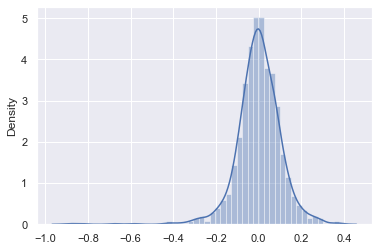

In [75]:
y_train_pred = lr_model.predict(sm.add_constant(X_train_sm))
print(r2_score(y_true=y_train, y_pred=y_train_pred))
res=y_train-y_train_pred
sns.distplot(res)

In [76]:
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE : 0.1438672219444888


**Observation From Multi Linear Regression model**

--Even though the train and test Rsquare values are same there is a lot of multi collinearity. And since the test set is very less we cannot make sure it performs good on unseen data alwell.

---As there are nearly 100 features involved the model is very complex so we need to perform regression techniquics and eliminate some of this features or penalise them.

In [77]:
X_train.shape

(1022, 173)

**Ridge**

In [78]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
model = Ridge()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1
                        )      

# fit the model
model_cv.fit(X_train,y_train)

# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
The best test score is -0.08951504711094146 corresponding to hyperparameters {'alpha': 2.0}


**The Best Alpha value identifies is 2.0 lets see in graphical view**

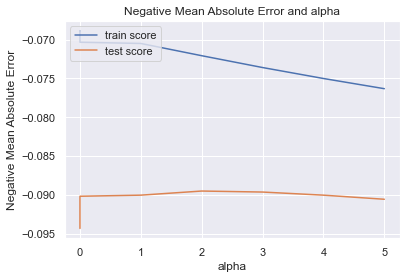

In [79]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [80]:
ridge = Ridge(alpha=2.0)
ridge.fit(X_train,y_train)
ridge.coef_

array([-1.14873488e-02,  3.97503080e-03,  2.31110593e-01,  3.76606734e-01,
        2.34275986e-01,  8.41918623e-02,  5.10376197e-04,  4.38665494e-02,
       -6.82390115e-04,  1.00131886e-01,  6.13760870e-02,  7.17956610e-02,
       -1.90553029e-02,  2.20131849e-02,  9.24565748e-03, -1.78957083e-02,
        3.54374127e-02,  3.56275470e-01,  2.12250000e-01,  4.88201168e-02,
        4.19783533e-01,  8.20726076e-02,  1.83814113e-02,  1.43039594e-01,
        7.04834086e-02,  1.48717458e-01, -9.58171023e-02,  8.78231886e-02,
        1.09204120e-01,  1.83531728e-01,  1.03053414e-01,  9.23649970e-03,
        5.50355647e-02,  6.18729410e-02,  6.67765227e-02,  5.99966360e-02,
        8.34277288e-02, -8.33815894e-02, -8.67527259e-03,  4.66329854e-02,
        1.04833895e-01,  4.42564598e-02,  1.66629765e-02,  4.35867706e-02,
       -5.96173446e-02,  4.20896451e-03,  8.34393932e-02,  2.58060317e-02,
        7.44016186e-02,  4.08781139e-02, -2.17227316e-02, -4.19017750e-02,
       -9.68725167e-03,  

**So of the coefficients are nearly zer0 but not zero, so feature elimination doesnt happen here.**

In [81]:
y_train_pred = ridge.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))

X_test=X_test[X_train.columns]
y_test_pred = ridge.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9220013342293983
0.8901054204758024


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

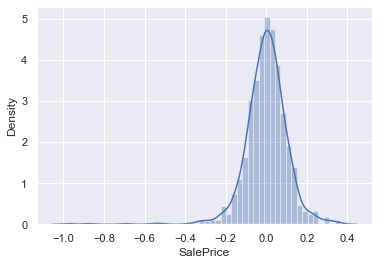

In [82]:
res=y_train-y_train_pred
sns.distplot(res)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

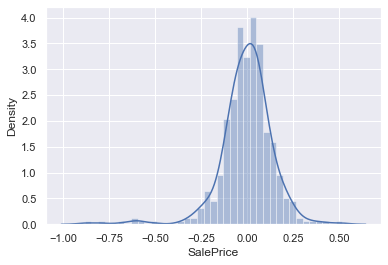

In [83]:
res=y_test-y_test_pred
sns.distplot(res)

**Observations**

In [84]:

print('RMSE :', np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE : 0.1441142629099716


**Top Coefficients in Ridge Model**

In [85]:
model_parameters = list(ridge.coef_ )
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 2) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
mod = list(zip(cols, model_parameters))
features = pd.DataFrame(mod)
features.columns = ['Variable', 'Coeff']
features = features.sort_values((['Coeff']), axis = 0, ascending = False)
features.head(10)

,Variable,Coeff
0,constant,10.34
21,GrLivArea,0.42
4,OverallQual,0.38
18,1stFlrSF,0.36
3,LotArea,0.23
5,OverallCond,0.23
19,2ndFlrSF,0.21
30,GarageArea,0.18
77,Neighborhood_StoneBr,0.18
26,BedroomAbvGr,0.15


**Lasso**

In [86]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
model = Lasso()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1
                        )      

# fit the model
model_cv.fit(X_train,y_train)

# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
The best test score is -0.08570265948481429 corresponding to hyperparameters {'alpha': 0.001}


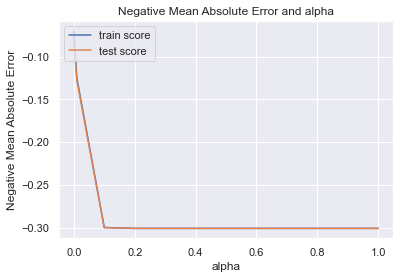

In [87]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

**Observations**
As we can see that after 0.01 the error is constant. So we can choose 0.01 but it will eliminate lot of features and Rsquare value also drops down to 77 on both train and test data so lets choose 0.001 which is suggested from best_hyperparameters from the model

In [88]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)
lasso.coef_

array([-5.85009188e-02,  0.00000000e+00,  2.18073845e-01,  4.88297243e-01,
        2.35344981e-01,  1.07456719e-01,  0.00000000e+00,  3.40307181e-02,
        0.00000000e+00,  1.44304099e-01,  2.09681460e-02,  7.91935377e-02,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.59010001e-02,  1.81070357e-01,  5.79762737e-02,  0.00000000e+00,
        8.48180182e-01,  4.77096202e-02,  0.00000000e+00,  8.85888546e-02,
        2.39035988e-02,  0.00000000e+00, -0.00000000e+00,  8.40096570e-02,
        9.00643785e-02,  1.82145897e-01,  6.52094333e-02,  0.00000000e+00,
        3.29777718e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.49128543e-02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -6.02402759e-02,  2.00363357e-02,
       -0.00000000e+00, -4.30222264e-03,  1.23924751e-02,  0.00000000e+00,
        2.16683875e-02,  3.31191347e-02, -0.00000000e+00, -0.00000000e+00,
       -3.66305024e-03,  

In [89]:
y_train_pred = lasso.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = lasso.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))


0.9051808506487304
0.894903283014278


In [90]:
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE : 0.1409332294724793


In [91]:
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 2) for x in model_parameters]
cols = X_train.columns  
cols = cols.insert(0, "constant")
mod = list(zip(cols, model_parameters))
features = pd.DataFrame(mod)
features.columns = ['Variable', 'Coeff']
features = features.sort_values((['Coeff']), axis = 0, ascending = False)
features.head()

,Variable,Coeff
0,constant,10.38
21,GrLivArea,0.85
4,OverallQual,0.49
5,OverallCond,0.24
3,LotArea,0.22


Top Coefficients in Lasso Model

In [92]:

CoeffNotZero = pd.DataFrame(features[(features['Coeff'] != 0)])
CoeffNotZero

,Variable,Coeff
0,constant,10.38
21,GrLivArea,0.85
4,OverallQual,0.49
5,OverallCond,0.24
3,LotArea,0.22
18,1stFlrSF,0.18
30,GarageArea,0.18
10,BsmtQual,0.14
77,Neighborhood_StoneBr,0.12
61,Neighborhood_Crawfor,0.11


In [93]:

CoeffNotZero.shape

(54, 2)

**Final Observations**-
-- GrLivArea,OverallQual,GarageArea,OverallCond,BsmtQual --Are top 5 positively correlated with Sale Price i.e If these values increase the sale price also increases.

-- MSZoning_RM,Neighborhood_Edwards,PropertyAge,MSSubClass,BsmtExposure_No --Are top 5 negatively correlated with Sale Price i.e If these values increase the sale price decreases.

--We can finalise the Lasso model as it has got down the features to 54.